In [1]:
import glob
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
# import mpld3 
import seaborn as sns
import palettable.colorbrewer.diverging as pld
# import palettable.lightbartlein.diverging as pld

import numpy as np
import pandas as pd
from sklearn import preprocessing

from scipy import integrate  
#import scipy.signal as scipy
from scipy.optimize import curve_fit
from scipy.signal import find_peaks
from gaussian_lorentz_fitting import _1peak_fit_PL, _2peak_fit_PL2, _1gauss, _2gauss

%matplotlib widget

In [2]:
plt.close('all')

In [3]:
## Plotting parameters

palette = pld.RdYlGn_4_r
# palette = pld.BlueGreen_4_r
cmap = palette.mpl_colormap
# cmap = cmap=plt.get_cmap('tab10')
transparency = 0.7
labelsize = 20
spinewidth = 3
fontsize = 26
legendsize = 20
fontweight = 'bold'
labelpad = 6
pad = 10
linewidth = 2.5


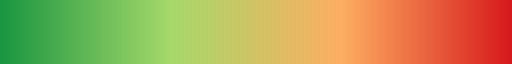

In [4]:
cmap

In [5]:
## Find the subfolders in the current working folder (cwd)
#cwd = os.getcwd()
# cwd = '/nsls2/users/clin1/Documents/Cheng-Hung/temp/20221108_insitu'
cwd = '/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230224_CsPbBr_ZnI'
subfolder = glob.glob(cwd + '/CsPb**')
subfolder.sort()
# del subfolder[-1]
print(*subfolder, sep = '\n')  ## Print one element per line

/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230224_CsPbBr_ZnI/CsPb_6mM_Br_12mM_I_000
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230224_CsPbBr_ZnI/CsPb_6mM_Br_12mM_I_008
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230224_CsPbBr_ZnI/CsPb_6mM_Br_12mM_I_016
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230224_CsPbBr_ZnI/CsPb_6mM_Br_12mM_I_032
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230224_CsPbBr_ZnI/CsPb_6mM_Br_12mM_I_048
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230224_CsPbBr_ZnI/CsPb_6mM_Br_12mM_I_064
/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230224_CsPbBr_ZnI/CsPb_6mM_Br_12mM_I_080
/Users/chenghunglin/Library/CloudS

In [6]:
title = [os.path.basename(subfolder[i]) for i in range(len(subfolder))]
print(*title, sep='\n')

title = ['CsPb 6mM + Br 12 mM',
         'CsPb 6mM + Br 12 mM + ZnI2 8uL/min', 
         'CsPb 6mM + Br 12 mM + ZnI2 16uL/min',
         'CsPb 6mM + Br 12 mM + ZnI2 32uL/min',
         'CsPb 6mM + Br 12 mM + ZnI2 48uL/min',
         'CsPb 6mM + Br 12 mM + ZnI2 64uL/min',
         'CsPb 6mM + Br 12 mM + ZnI2 80uL/min',
         'CsPb 6mM + Br 12 mM + ZnI2 96uL/min',
         'CsPb 6mM + Br 12 mM + ZnI2 112uL/min',
         'CsPb 6mM + Br 12 mM + ZnI2 128uL/min']
         # 'Insitu CsPb 6mM + Br 6 mM + ZnI2 128uL/min']

label = ['CsPbBr',
         'ZnI2 8 uL/min', 
         'ZnI2 16 uL/min',
         'ZnI2 32 uL/min',
         'ZnI2 48 uL/min',
         'ZnI2 64 uL/min', 
         'ZnI2 80 uL/min',
         'ZnI2 96 uL/min',
         'ZnI2 112 uL/min',
         'ZnI2 128 uL/min']
         # 'ZnI2 128 uL/min']

CsPb_6mM_Br_12mM_I_000
CsPb_6mM_Br_12mM_I_008
CsPb_6mM_Br_12mM_I_016
CsPb_6mM_Br_12mM_I_032
CsPb_6mM_Br_12mM_I_048
CsPb_6mM_Br_12mM_I_064
CsPb_6mM_Br_12mM_I_080
CsPb_6mM_Br_12mM_I_096
CsPb_6mM_Br_12mM_I_112
CsPb_6mM_Br_12mM_I_128


In [7]:
len(subfolder)

10

In [8]:
## Reading dark and reference
dark = glob.glob(cwd + '/' + 'Dark_100**.csv')
ref = glob.glob(cwd + '/' + 'tol**100**.csv')

dark_df = pd.read_csv(dark[0], skiprows=5, sep=',')
ref_df = pd.read_csv(ref[0], skiprows=5, sep=',')

In [9]:
dark

['/Users/chenghunglin/Library/CloudStorage/OneDrive-BrookhavenNationalLaboratory/data_processing/20230224_CsPbBr_ZnI/Dark_100ms_Abs_20230224-153342_03294b71.csv']

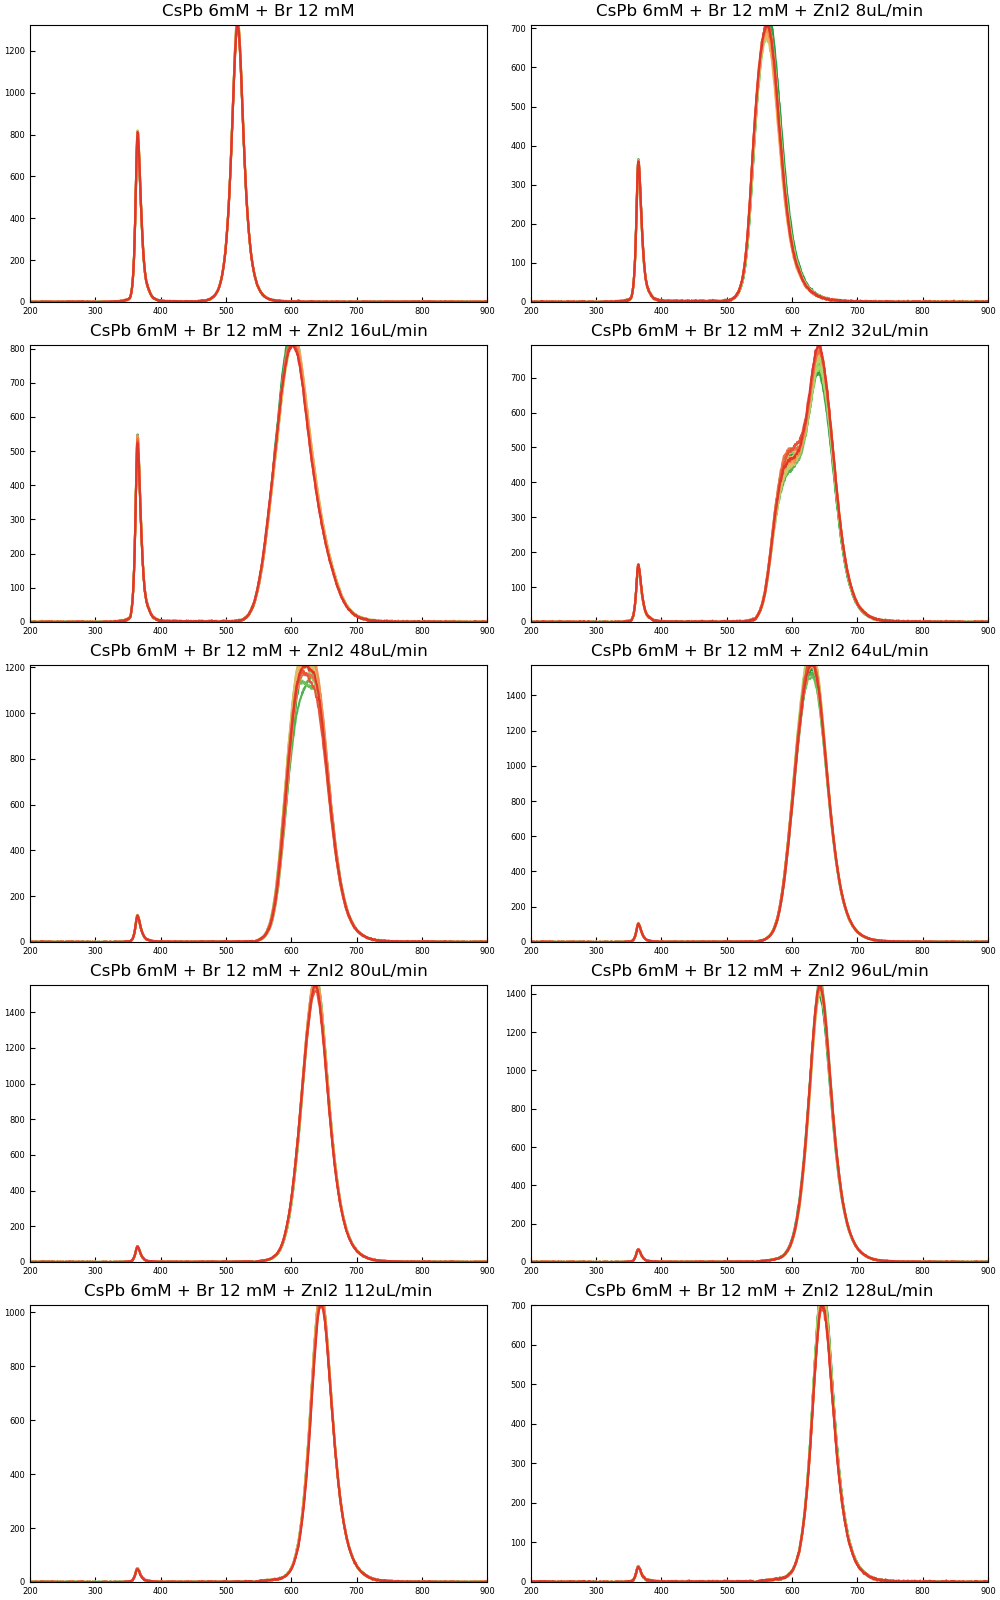

In [10]:
## Plot All PL profiles in each subfolder
#f1, ax1 = plt.subplots(2, int(np.rint(len(subfolder)/2)), figsize = (10, 8), constrained_layout=True)
f1, ax1 = plt.subplots(5, 2, figsize = (10, 16), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

ax1 = ax1.flatten()
df = pd.DataFrame()
df_norm = pd.DataFrame()
df_norm2 = pd.DataFrame()

## Wavelength range
w1 = 245
w2 = 800

for i in range(len(subfolder)):
# for i in range(1):
    data_files = glob.glob(subfolder[i] + '/**PL**.csv')
    data_files.sort()
    del data_files[0]
    
    ## Data file range
    k1 = 0
    k2 = len(data_files)
    
    color_idx = np.linspace(0, 1, k2-k1+1)
    # color_idx = np.linspace(0, 1, 10)
    #ax1[i].set_title(os.path.basename(subfolder[i]), {'fontsize': 14, 'fontweight': fontweight})
    ax1[i].set_title(title[i], fontsize=12)
    df_i = pd.DataFrame()
    
    if i == 0: skiprows=8
    else: skiprows=10
    
    for j in range(k1, k2):
        # df_j = pd.read_csv(data_files[j], names=['wavelength', 'intensity'], skiprows=14, sep='\t')
        df_j = pd.read_csv(data_files[j], skiprows=skiprows, sep=',')
        PL = df_j['Sample']-dark_df.Sample
        ax1[i].plot(df_j.Energy, PL, color=cmap(color_idx[j-k1]))
        ax1[i].set_xlim(200, 900)
        ax1[i].set_ylim(-0.1, max(PL[100:800])+0.2)
        ax1[i].tick_params(axis='both', direction='in', labelsize=6)
        
        ## Insert Annotation
        '''
        at = AnchoredText(label[i], prop=dict(size=10), frameon=True, loc='upper right')
        at.patch.set_boxstyle("round,pad=0.01,rounding_size=0.3")
        ax1[i].add_artist(at)
        '''
        
        #df_i[f'Iten_{j}'] = df_j.intensity
        df_i = pd.concat([df_i, PL], axis=1, ignore_index=True)
    
    df[f'{os.path.basename(subfolder[i])}']= df_i.mean(axis=1)
    #df_norm[f'{os.path.basename(subfolder[i])}']= df_i.mean(axis=1) / df_i.mean(axis=1).sum(axis=0)
    df_norm[f'{os.path.basename(subfolder[i])}']= df[f'{os.path.basename(subfolder[i])}'].loc[w1:w2] / df[f'{os.path.basename(subfolder[i])}'].loc[w1:w2].sum(axis=0)
    
    
    x = df[f'{os.path.basename(subfolder[i])}'].loc[w1:w2].values #returns a numpy array
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x.reshape(-1,1))
    df_norm2[f'{os.path.basename(subfolder[i])}']= x_scaled.flatten()

    
df['Energy'] = df_j.Energy
df_norm['Energy'] = df_j.Energy.loc[w1:w2]
#df_norm2['wavelength'] = df_j.wavelength.loc[w1:w2]
df_norm2.loc[0:w2-w1, 'Energy'] = df_j.Energy.loc[w1:w2].values

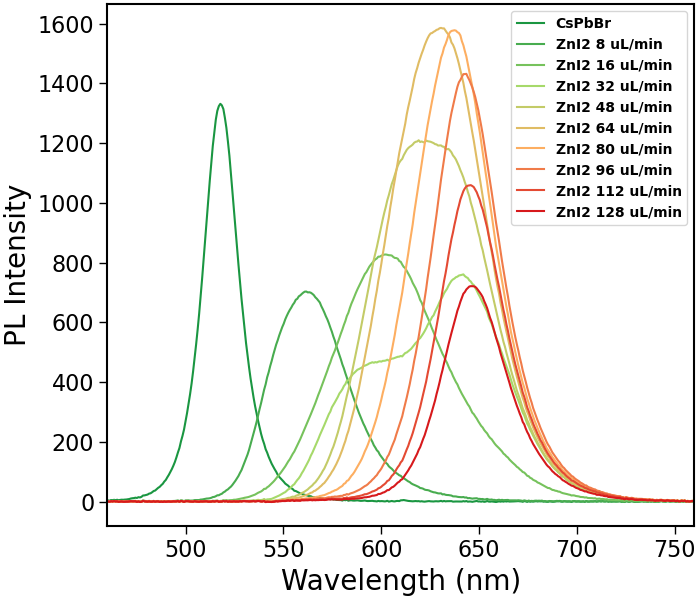

In [11]:
## Plot average PL profiles in each subfolder
f2, ax2 = plt.subplots(1, 1, figsize = (7, 6), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

k = len(subfolder)
color_idx = np.linspace(0, 1, k)
for i in range(len(subfolder)):
    #ax2.set_title(os.path.basename(subfolder[i]), {'fontsize': 14, 'fontweight': fontweight})
    ax2.plot(df.Energy, getattr(df, os.path.basename(subfolder[i])), color=cmap(color_idx[i]), label=label[i])

legend_properties = {'weight':'bold', 'size':10}    
ax2.legend(fontsize=legendsize, prop=legend_properties)

ax2.set_xlim(460, 760)
# ax2.set_ylim(-0.05, 1.4)
ax2.set_xlabel('Wavelength (nm)', fontsize=20, fontweight='regular')
ax2.set_ylabel('PL Intensity', fontsize=20, fontweight='regular')
ax2.tick_params(axis='both', direction='out', labelsize=16, size=6, width=1)
spinewidth = 1.5
ax2.spines["bottom"].set_linewidth(spinewidth)
ax2.spines["right"].set_linewidth(spinewidth)
ax2.spines["top"].set_linewidth(spinewidth)
ax2.spines["left"].set_linewidth(spinewidth)

imag_name = '20221121_PL_CsPbBr_02.png'
# plt.savefig(cwd + '/' + imag_name, dpi = 300,  transparent=True)

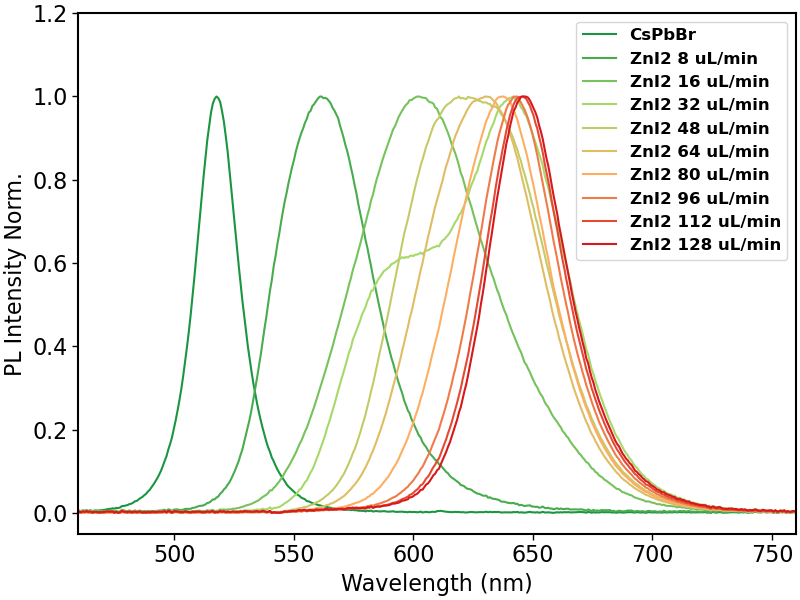

In [12]:
## Plot Normalized (by Max-min) PL profiles in each subfolder
f5, ax5 = plt.subplots(1, 1, figsize = (8, 6), constrained_layout=True)
# f1, (ax1, ax2) = plt.subplots(1, 2, figsize = (6, 9), gridspec_kw={'width_ratios': [1,1]})

# mpld3.disable_notebook()
# label = title
k = len(subfolder)
color_idx = np.linspace(0, 1, k)
for i in range(len(subfolder)):
    #ax2.set_title(os.path.basename(subfolder[i]), {'fontsize': 14, 'fontweight': fontweight})
    ax5.plot(df_norm2.Energy, getattr(df_norm2, os.path.basename(subfolder[i])), color=cmap(color_idx[i]), label=label[i])

legend_properties = {'weight':'bold', 'size':12}    
ax5.legend(prop=legend_properties)

ax5.set_xlim(460, 760)
ax5.set_ylim(-0.05, 1.2)
ax5.set_xlabel('Wavelength (nm)', fontsize=16, fontweight='regular')
ax5.set_ylabel('PL Intensity Norm.', fontsize=16, fontweight='regular')
ax5.tick_params(axis='both', direction='out', labelsize=16, size=4, width=1)
spinewidth = 1.5
ax5.spines["bottom"].set_linewidth(spinewidth)
ax5.spines["right"].set_linewidth(spinewidth)
ax5.spines["top"].set_linewidth(spinewidth)
ax5.spines["left"].set_linewidth(spinewidth)

imag_name = '20221121_PL_CsPbBr_Cl_02.png'
# plt.savefig(cwd + '/' + imag_name, dpi = 300,  transparent=True)

i=0, by _peak_fit_PL


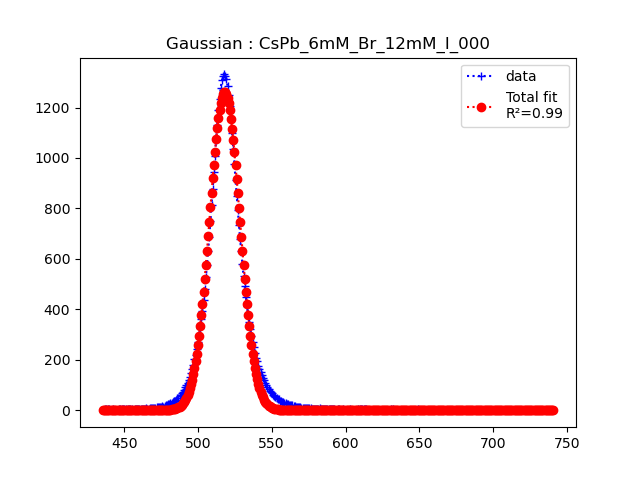

i=1, by _peak_fit_PL


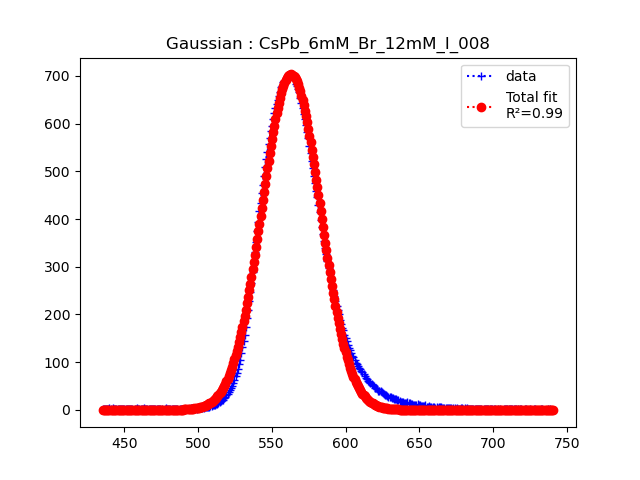

i=2, by _2peak_fit_PL2


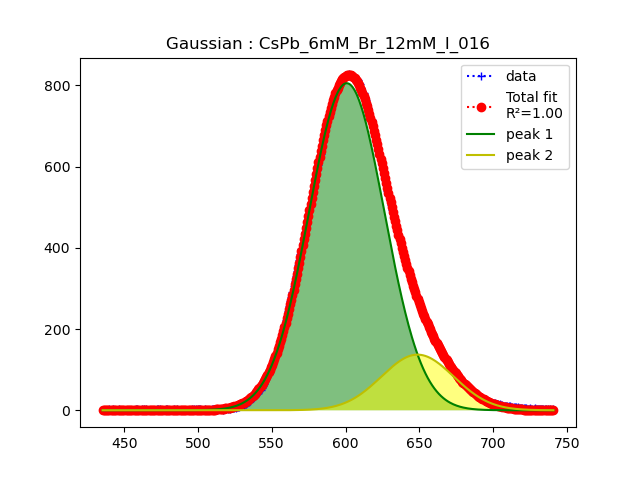

i=3, by _2peak_fit_PL2


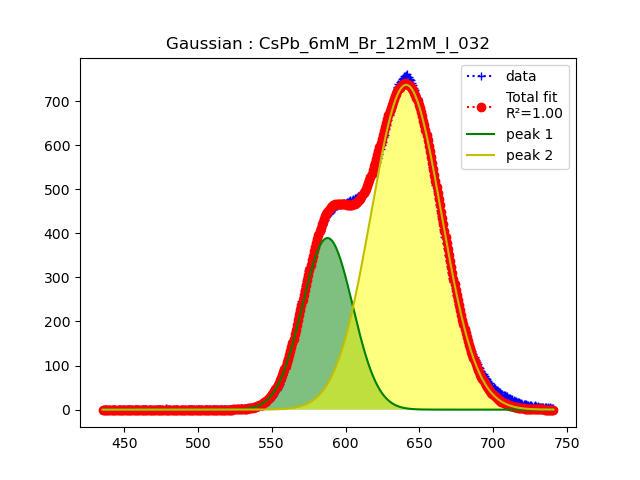

i=4, by _peak_fit_PL


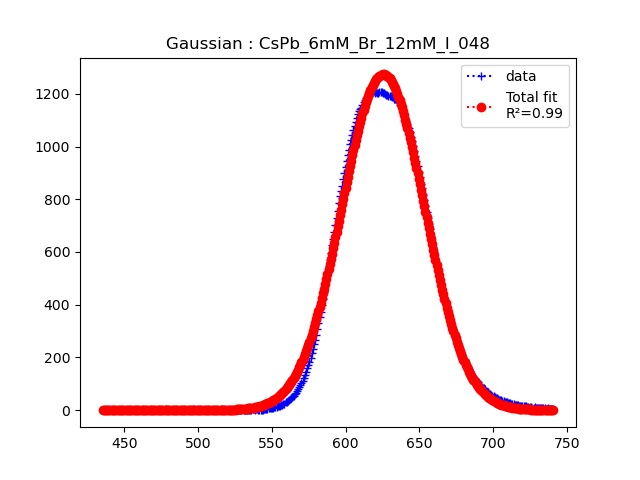

i=5, by _peak_fit_PL


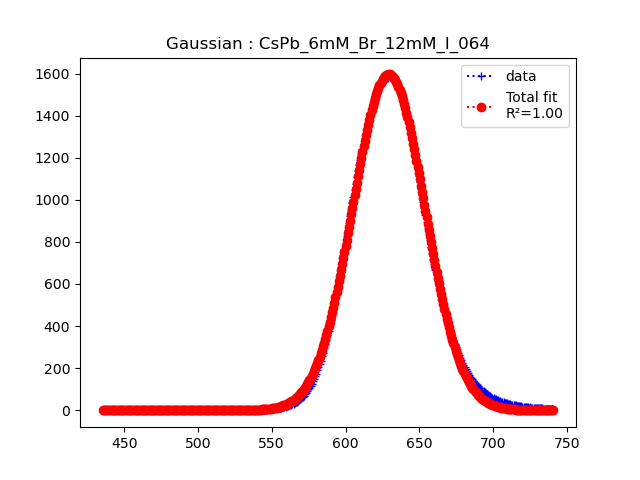

i=6, by _peak_fit_PL


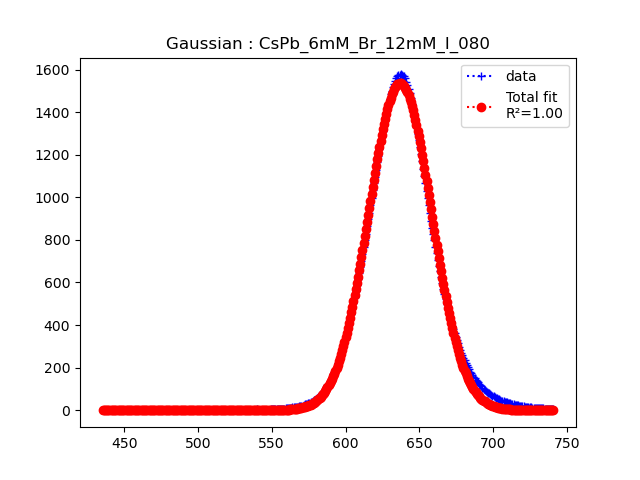

i=7, by _peak_fit_PL


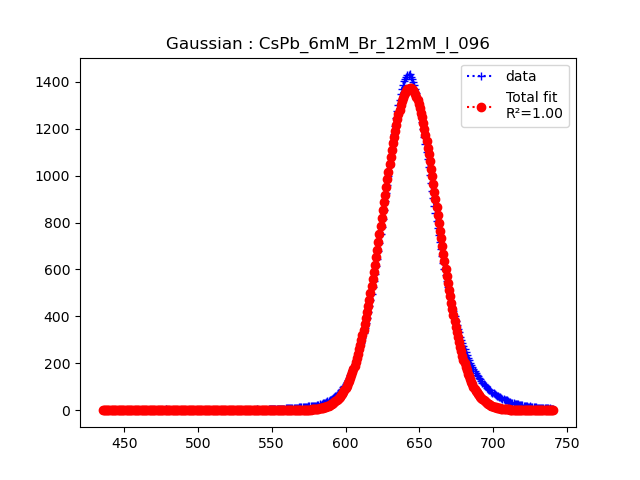

i=8, by _peak_fit_PL


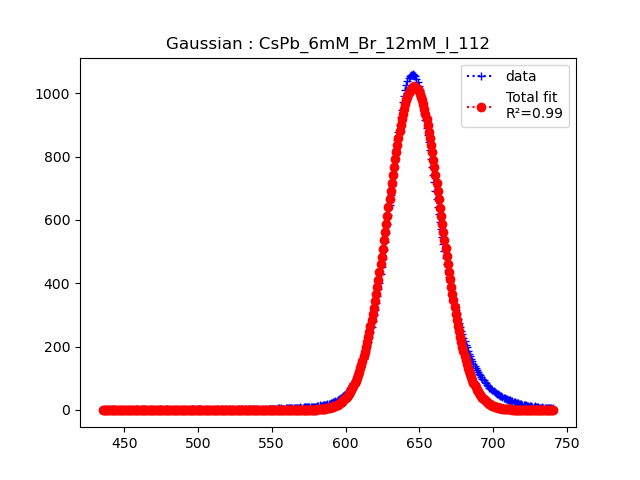

i=9, by _peak_fit_PL


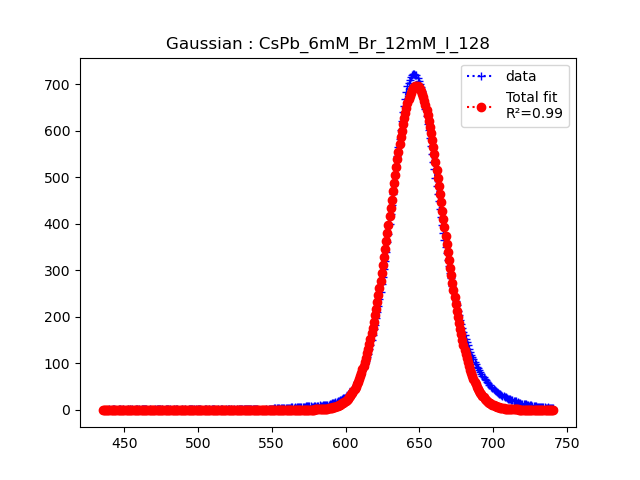

In [13]:
## Gaussian peak fittimg

# f3, ax3 = plt.subplots(4, 3, figsize = (12, 15), constrained_layout=True)
# ax3 = ax3.flatten()
w1 = 300
w2 = 700
num_peak_list = [1,1,2,2,1,1,1,1,1,1]


peak = []
fwhm = []
simpson_int = []

for i in range(len(subfolder)):
# for i in [1,3]:
    #i = 4
    # x = np.array(df[w1:w2].Energy)
    # y = np.array(getattr(df[w1:w2], os.path.basename(subfolder[i])))
    #_2peak_fit_PL(x,y, distr='G', height=1000, second_peak=-4, plot=True, plot_title=os.path.basename(subfolder[i]))
    
    if num_peak_list[i]==1:
        print(f'i={i}, by _peak_fit_PL')
        # w1 = 255
        # w2 = 460
        x = np.array(df[w1:w2].Energy)
        y = np.array(getattr(df[w1:w2], os.path.basename(subfolder[i])))
        popt, r_2 = _1peak_fit_PL(x,y, distr='G', plot=True, plot_title=os.path.basename(subfolder[i]))
        fitted_result = _1gauss(x, *popt)
        simpson_int.append(integrate.simpson(fitted_result,x))
        peak.append(popt[1])
        fwhm.append(2.355*abs(popt[2]))
    
    elif num_peak_list[i]==2:
        print(f'i={i}, by _2peak_fit_PL2')
        # w1 = 255
        # w2 = 460
        x = np.array(df[w1:w2].Energy)
        y = np.array(getattr(df[w1:w2], os.path.basename(subfolder[i])))
        popt, r_2 = _2peak_fit_PL2(x,y, distr='G', height=200, second_peak=460, maxfev = 10000000, plot=True, plot_title=os.path.basename(subfolder[i]))
        fitted_result = _2gauss(x, *popt)
        simpson_int.append(integrate.simpson(_1gauss(x, *popt[3:]), x))
        peak.append(popt[4])
        fwhm.append(2.355*abs(popt[5]))
        
    # elif i == 3:
    #     print(f'i={i}, by _3peak_fit_PL2')
    #     # w1 = 255
    #     # w2 = 460
    #     x = np.array(df[w1:w2].Energy)
    #     y = np.array(getattr(df[w1:w2], os.path.basename(subfolder[i])))
    #     popt, r_2 = _3peak_fit_PL2(x,y, distr='G', height=600, second_peak=440, third_peak=510, maxfev = 10000000)
    #     fitted_result = _3gauss(x, *popt)
    #     simpson_int.append(integrate.simpson(_1gauss(x, *popt[:3]), x))
    #     peak.append(popt[1])
    #     fwhm.append(2.355*abs(popt[2]))

    
    # simpson_int.append(integrate.simpson(y,x))
    # peak.append(popt[1])
    # fwhm.append(2.355*abs(popt[2]))

    # r2 = f'R\u00b2={r_2:.2f}'        
    # ax3[i].set_title(os.path.basename(subfolder[i]))
    # ax3[i].plot(x,y,'b+:',label='data')
    # ax3[i].plot(x,fitted_result,'ro:',label='Total fit\n'+r2, alpha=0.5, markersize=4)
    # ax3[i].legend()


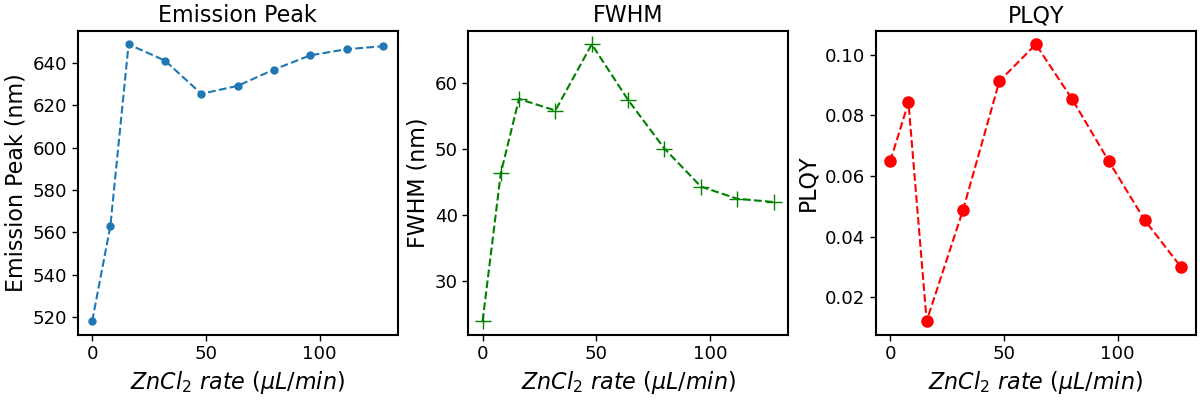

In [14]:
## Summarize Emission Pak, FWHM, and PLQY

# abs_365 = np.asarray([0.458828, 0.373916, 0.656800, 1.052980, 1.582505, 1.302717])
# abs_365 = np.asarray([0.458828, 0.373916, 0.656800, 1.052980, 1.582505])
# abs_365 = np.asarray([0.788602, 0.772264, 0.547465, 0.474316, 0.393944])
# abs_365 = np.asarray([0.751848, 0.553461, 0.608937, 0.686777, 0.652571])
abs_365 = np.asarray([1.092530, 0.907093, 1.510603, 1.977822, 2.156741, 2.080834, 2.114234, 2.195306, 2.241870, 2.293064])
abs_365_r = 1.181385
# plqy_r = 0.94
plqy_r = 0.546
ref_idx_toluene = 1.506
# ref_idx_etoh = 1.3614
ref_idx_H2SO4 = 1.337
integral_r = 371787.7270897358
integral_pqds = np.asarray(simpson_int)

plqy = plqy_r*abs_365_r*(ref_idx_toluene**2)*integral_pqds / (integral_r*(ref_idx_H2SO4**2)*abs_365)
    
f4, ax4 = plt.subplots(1, 3, figsize = (12, 4), constrained_layout=True)
labelsize = 16
x_list = [0,8,16,32,48,64,80,96,112,128]
ax4[0].set_title('Emission Peak', fontdict={'size': labelsize})
ax4[0].plot(x_list, peak, '.--', markersize=10)
ax4[0].set_xlabel(r'$ZnCl_2\ rate\ (\mu L/min)$', fontdict={'size': labelsize})
ax4[0].set_ylabel('Emission Peak (nm)', fontdict={'size': labelsize})

ax4[1].set_title('FWHM', fontdict={'size': labelsize})
ax4[1].plot(x_list, fwhm, 'g+--', markersize=12)
ax4[1].set_xlabel(r'$ZnCl_2\ rate\ (\mu L/min)$', fontdict={'size': labelsize})
ax4[1].set_ylabel('FWHM (nm)', fontdict={'size': labelsize})

ax4[2].set_title('PLQY', fontdict={'size': labelsize})
ax4[2].plot(x_list, plqy, 'ro--', markersize=8)
ax4[2].set_xlabel(r'$ZnCl_2\ rate\ (\mu L/min)$', fontdict={'size': labelsize})
ax4[2].set_ylabel('PLQY', fontdict={'size': labelsize})

for i in range(len(ax4)):    
    # ax4.set_xlim(440, 750)
    # ax4.set_ylim(-0.05, 1.2)
    # ax4.set_xlabel('Wavelength (nm)', fontsize=16, fontweight='regular')
    # ax4.set_ylabel('PL Intensity Norm.', fontsize=16, fontweight='regular')
    ax4[i].tick_params(axis='both', direction='out', labelsize=13, size=4, width=1)
    spinewidth = 1.5
    ax4[i].spines["bottom"].set_linewidth(spinewidth)
    ax4[i].spines["right"].set_linewidth(spinewidth)
    ax4[i].spines["top"].set_linewidth(spinewidth)
    ax4[i].spines["left"].set_linewidth(spinewidth)

imag_name = '20221121_PL_CsPbBr_Cl_01.png'
# plt.savefig(cwd + '/' + imag_name, dpi = 300,  transparent=True)

In [15]:
simpson_int

[32199.51185428144,
 34711.22387902648,
 8404.389396115694,
 43843.72761802802,
 89379.06830584783,
 97699.32158202097,
 81928.23584578544,
 64832.63032727567,
 46210.24996479173,
 31149.252957680426]

In [18]:
integral_pqds

array([32199.51185428, 34711.22387903,  8404.38939612, 43843.72761803,
       89379.06830585, 97699.32158202, 81928.23584579, 64832.63032728,
       46210.24996479, 31149.25295768])

In [ ]:
# for i in range(len(peak1)):
#     if peak1[i] > peak2[i]:
#         a, b = peak1[i], peak2[i]
#         peak1[i], peak2[i] = b, a
#         c, d = fwhm1[i], fwhm2[i]
#         fwhm1[i], fwhm2[i] = d, c